In [1]:
#import required packages
#basics
import pandas as pd 
import numpy as np
import os

#misc
import gc
import time
import warnings

#stats
#from scipy.misc import imread
from scipy import sparse
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
#import matplotlib_venn as venn

#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords

#import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize

# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   


#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

import  textblob
import xgboost
#from keras.preprocessing import text, sequence
#from keras import layers, models, optimizers

from textblob import TextBlob
from nltk.stem import PorterStemmer
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from textblob import Word

#settings
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
eng_stopwords = set(stopwords.words("english"))
warnings.filterwarnings("ignore")

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

%matplotlib inline

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Akshay\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Akshay\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
%pwd

'C:\\Users\\Akshay\\Desktop\\TEXT-MINING\\REFERENCE-MATERIAL'

In [3]:
os.chdir('C:\\Users\\Akshay\\Desktop\\NLP- Woman Clothing')

In [4]:
cloths = pd.read_csv('Womens Clothing Reviews Data.csv')

In [5]:
cloths

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1
...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1
23482,862,General Petite,Tops,Knits,Gurgaon,Web,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1
23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0
23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1


In [6]:
cloths = cloths.drop(columns = ['Product ID', 'Review Title'], axis=1)

In [7]:
cloths.rename(columns={'Customer Age':'Customer_Age', 'Review Text':'Review_Text', 'Recommend Flag':'Recommend_Flag' }, inplace=True)

In [8]:
cloths.sort_values('Rating')

,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Text,Rating,Recommend_Flag
20289,General Petite,Bottoms,Jeans,Mumbai,Web,37,I purchased these in january and today i am go...,1,0
14201,General,Jackets,Outerwear,Bangalore,Web,26,"This coat is awful, just awful. i bought it ba...",1,0
22346,General,Bottoms,Shorts,Bangalore,Web,30,I followed the other reviews and sized down. n...,1,0
23019,General,Bottoms,Skirts,Mumbai,Web,30,This skirt is definitely not what i was expect...,1,0
18740,General,Dresses,Dresses,Chennai,Mobile,37,"Quality was not what you expect from retailer,...",1,0
...,...,...,...,...,...,...,...,...,...
10078,General Petite,Intimate,Lounge,Bangalore,Mobile,44,"This is the perfect tank. it's super soft, gre...",5,1
10079,General Petite,Intimate,Lounge,Chennai,Web,36,These tanks are very soft. i have two black an...,5,1
10080,General,Tops,Knits,Gurgaon,Mobile,66,Love the cut of this t-shirt. just loose enoug...,5,1
10082,General,Tops,Blouses,Mumbai,Web,39,"But when i saw this top in person, urged by my...",5,1


In [9]:
df = cloths.copy()

### Exploratory Data Analysis

In [ ]:
df['Review_Text'] = df['Review_Text'].astype(str)
df['count_sent']=df["Review_Text"].apply(lambda x: len(re.findall("\n",str(x)))+1)

#Word count in each comment:
df['count_word']=df["Review_Text"].apply(lambda x: len(str(x).split()))

#Unique word count
df['count_unique_word']=df["Review_Text"].apply(lambda x: len(set(str(x).split())))

#Letter count
df['count_letters']=df["Review_Text"].apply(lambda x: len(str(x)))

#Word density
df['word_density'] = df['count_letters'] / (df['count_word']+1)

#punctuation count
df["count_punctuations"] =df["Review_Text"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df["count_words_upper"] = df["Review_Text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#lower case words count
df["count_words_lower"] = df["Review_Text"].apply(lambda x: len([w for w in str(x).split() if w.islower()]))

#title case words count
df["count_words_title"] = df["Review_Text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
df["count_stopwords"] = df["Review_Text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

#Average length of the words
df["mean_word_len"] = df["Review_Text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

#Number of numeric
df['numeric'] = df['Review_Text'].apply(lambda x :len([x for x in x.split() if x.isdigit()]))

#Number of alphanumeric
df['alphanumeric'] = df['Review_Text'].apply(lambda x :len([x for x in x.split() if x.isalnum()]))

#Number of alphabetics
df['alphabetetics'] = df['Review_Text'].apply(lambda x :len([x for x in x.split() if x.isalpha()]))

#Number of alphabetics
df['Spaces'] = df['Review_Text'].apply(lambda x :len([x for x in x.split() if x.isspace()]))

#Number of Words ends with
df['words_ends_with_et'] = df['Review_Text'].apply(lambda x :len([x for x in x.lower().split() if x.endswith('et')]))

#Number of Words starts with
df['words_start_with_no'] = df['Review_Text'].apply(lambda x :len([x for x in x.lower().split() if x.startswith('no')]))

# Count the occurences of all words
df['wordcounts'] = df['Review_Text'].apply(lambda x :dict([ [t, x.split().count(t)] for t in set(x.split()) ]))

pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

df['noun_count'] = df['Review_Text'].apply(lambda x: check_pos_tag(x, 'noun'))
df['verb_count'] = df['Review_Text'].apply(lambda x: check_pos_tag(x, 'verb'))
df['adj_count']  = df['Review_Text'].apply(lambda x: check_pos_tag(x, 'adj'))
df['adv_count']  = df['Review_Text'].apply(lambda x: check_pos_tag(x, 'adv'))
df['pron_count'] = df['Review_Text'].apply(lambda x: check_pos_tag(x, 'pron')) 

In [10]:
print(cloths.Rating.value_counts(),"\n In Percentage \n",cloths.Rating.value_counts()/sum(cloths.Rating.value_counts())*100)

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64 
 In Percentage 
 5    55.909904
4    21.617134
3    12.224304
2     6.663544
1     3.585115
Name: Rating, dtype: float64


In [11]:
cloths.isna().sum()

Category           14
Subcategory1       14
SubCategory2       14
Location            0
Channel             0
Customer_Age        0
Review_Text       845
Rating              0
Recommend_Flag      0
dtype: int64

In [12]:
cloths.dropna(subset=['Review_Text','Category'],inplace=True)

In [13]:
cloths.isna().sum()

Category          0
Subcategory1      0
SubCategory2      0
Location          0
Channel           0
Customer_Age      0
Review_Text       0
Rating            0
Recommend_Flag    0
dtype: int64

In [14]:
cloths.Review_Text[0]

'Absolutely wonderful - silky and sexy and comfortable'

In [15]:
TextBlob(cloths.Review_Text[0]).sentiment.polarity

0.6333333333333333

In [16]:
cloths.Review_Text[1947]

'This is a beautiful sweater! it is not too heavy and the variation in knit from front to back makes not the same old boring sweater. the color is gorgeous.'

In [17]:
TextBlob(cloths.Review_Text[1947]).sentiment.polarity

0.08571428571428572

## Check the sentiment polarity score for negative review.

In [19]:
rev1 = 'The clothing quality is bad. Unsatisfied product'

In [20]:
TextBlob(rev1).sentiment.polarity

-0.6999999999999998

### Calculating Sentiment analysis using Textblob module

In [21]:
cloths['Sentiment_Score'] = cloths["Review_Text"].apply(lambda x: TextBlob(x).sentiment.polarity)
cloths.head()

,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Text,Rating,Recommend_Flag,Sentiment_Score
0,Initmates,Intimate,Intimates,Mumbai,Mobile,33,Absolutely wonderful - silky and sexy and comf...,4,1,0.633333
1,General,Dresses,Dresses,Bangalore,Mobile,34,Love this dress! it's sooo pretty. i happene...,5,1,0.339583
2,General,Dresses,Dresses,Gurgaon,Mobile,60,I had such high hopes for this dress and reall...,3,0,0.073675
3,General Petite,Bottoms,Pants,Chennai,Web,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0.550000
4,General,Tops,Blouses,Bangalore,Web,47,This shirt is very flattering to all due to th...,5,1,0.512891


In [22]:
cloths['Sentiment_Cat'] = np.where(cloths.Sentiment_Score>0.1,'Positive', 'Negative')
cloths.head()

,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Text,Rating,Recommend_Flag,Sentiment_Score,Sentiment_Cat
0,Initmates,Intimate,Intimates,Mumbai,Mobile,33,Absolutely wonderful - silky and sexy and comf...,4,1,0.633333,Positive
1,General,Dresses,Dresses,Bangalore,Mobile,34,Love this dress! it's sooo pretty. i happene...,5,1,0.339583,Positive
2,General,Dresses,Dresses,Gurgaon,Mobile,60,I had such high hopes for this dress and reall...,3,0,0.073675,Negative
3,General Petite,Bottoms,Pants,Chennai,Web,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0.550000,Positive
4,General,Tops,Blouses,Bangalore,Web,47,This shirt is very flattering to all due to th...,5,1,0.512891,Positive


In [137]:
cloths.Sentiment_Cat.value_counts()

Positive    18668
Negative     3960
Name: Sentiment_Cat, dtype: int64

In [138]:
cloths.Rating.value_counts()

5    12527
4     4908
3     2823
2     1549
1      821
Name: Rating, dtype: int64

In [139]:
pd.crosstab(cloths.Rating, cloths.Sentiment_Cat)

Sentiment_Cat,Negative,Positive
Rating,,
1,442,379
2,691,858
3,884,1939
4,885,4023
5,1058,11469


In [140]:
negate_sent_posit_score = cloths[((cloths.Sentiment_Cat == 'Negative') & (cloths.Rating >= 4))]

In [141]:
negate_sent_posit_score.Review_Text

8        I love this dress. i usually get an xs but it ...
28       I have several of goodhyouman shirts and i get...
44       Tried this on today at my local retailer and h...
72       I have a short torso and this works well for m...
78       I usually size up with this brand. small was p...
                               ...                        
23412    Love the look! it's a little tight but i still...
23414    The front and back materials differ. the back ...
23441    Don't know why but i didn't have high expectat...
23458    This is my new favorite sweater. it is lightwe...
23469    My size was not available so based on reviews ...
Name: Review_Text, Length: 1943, dtype: object

In [142]:
negate_sent_posit_score.Review_Text[8]

'I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.'

In [165]:
Positive_Review = cloths.Review_Text[cloths.Rating >= 4]
Negative_Review = cloths.Review_Text[cloths.Rating < 4]

In [166]:
Positive_Review.shape, Negative_Review.shape

((17435,), (5193,))

#### Sentiment analysis by Channel.

In [167]:
cloths.Channel.value_counts()

Web       13090
Mobile     9538
Name: Channel, dtype: int64

In [168]:
pd.crosstab(cloths.Rating, cloths.Channel)

Channel,Mobile,Web
Rating,,
1,349,472
2,616,933
3,1171,1652
4,2043,2865
5,5359,7168


#### Sentiment analysis by Category.

In [169]:
cloths.Category.value_counts()

General           13365
General Petite     7837
Initmates          1426
Name: Category, dtype: int64

In [170]:
pd.crosstab(cloths.Rating, cloths.Category)

Category,General,General Petite,Initmates
Rating,,,
1,479,291,51
2,950,524,75
3,1740,929,154
4,2910,1702,296
5,7286,4391,850


#### Sentiment analysis by Sub-Category.

In [171]:
cloths.Subcategory1.value_counts()

Tops        10048
Dresses      6145
Bottoms      3662
Intimate     1653
Jackets      1002
Trend         118
Name: Subcategory1, dtype: int64

In [172]:
pd.crosstab(cloths.Rating, cloths.Subcategory1)

Subcategory1,Bottoms,Dresses,Intimate,Jackets,Tops,Trend
Rating,,,,,,
1,114,222,60,48,367,10
2,203,459,87,60,729,11
3,407,830,177,90,1300,19
4,762,1367,350,195,2208,26
5,2176,3267,979,609,5444,52


#### Sentiment analysis by Location.

In [173]:
cloths.Location.value_counts()

Gurgaon      8486
Mumbai       6856
Bangalore    5048
Chennai      2238
Name: Location, dtype: int64

In [174]:
pd.crosstab(cloths.Rating, cloths.Location)

Location,Bangalore,Chennai,Gurgaon,Mumbai
Rating,,,,
1,189,72,319,241
2,347,152,579,471
3,626,271,1088,838
4,1098,535,1797,1478
5,2788,1208,4703,3828


### Split the data into train & Test

In [175]:
# define X and y
X = cloths.Review_Text
y = cloths.Rating

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16971,)
(5657,)
(16971,)
(5657,)


### Creating user defined functions for clean the text and pre-process the data

In [176]:
def clean_text(Review_Text):
    Review_Text = Review_Text.lower()
    Review_Text = Review_Text.strip()
    Review_Text = re.sub(r' +', ' ', Review_Text)
    Review_Text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", Review_Text)
    return(Review_Text)

In [177]:
stop = set(nltk.corpus.stopwords.words('english'))

In [178]:
import string

def pre_process(Review_Text):
    #Review_Text = Review_Text.str.replace('/','')                           #Replacing the / with none
    #Review_Text = Review_Text.apply(lambda x: re.sub("  "," ", x))          #Replacing double space with single space
    #Review_Text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,']", "", Review_Text)      #Replacing special character with none
    #Review_Text = re.sub(r'[0-9]+', '', Review_Text)                        #Replacing numbers with none
    #Review_Text = Review_Text.apply(lambda x: " ".join(x.translate(str.maketrans('', '', string.punctuation)) for x in x.split() if x.isalpha()))
    Review_Text = Review_Text.apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #Removing stop words
    #Review_Text = Review_Text.apply(lambda x: str(TextBlob(x).correct()))                      #Correct spelling corrections
    #Review_Text = Review_Text.apply(lambda x: " ".join(PorterStemmer().stem(word) for word in x.split())) #Stemming using porter stemmer
    #Review_Text = Review_Text.apply(lambda x: " ".join(stemmer_func(word) for word in x.split()))        #Stemming
    #Review_Text = Review_Text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))   #lemmatization
    #Review_Text = Review_Text.apply(lambda x: " ".join(word for word, pos in pos_tag(x.split()) if pos not in ['NN','NNS','NNP','NNPS'])) #Removing nouns etc
    return(Review_Text)

In [179]:
X_train = X_train.apply(lambda x: clean_text(x))
X_test = X_test.apply(lambda x: clean_text(x))

In [180]:
Positive_Review = Positive_Review.apply(lambda x: clean_text(x))
Negative_Review = Negative_Review.apply(lambda x: clean_text(x))

In [181]:
X_train=pre_process(X_train)
X_test=pre_process(X_test)

In [182]:
Positive_Review = pre_process(Positive_Review)
Negative_Review = pre_process(Negative_Review)

### Vectorization (Count)

In [183]:
#Train
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1), 
                             min_df=5, 
                             encoding='utf-8' ,
                             max_features=1000)
xtrain_count = count_vect.fit_transform(X_train)

In [184]:
dtm = xtrain_count.toarray()

In [185]:
dtm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [186]:
count_vect.get_feature_names()

['able',
 'absolutely',
 'across',
 'actually',
 'add',
 'added',
 'addition',
 'adds',
 'adorable',
 'adore',
 'afraid',
 'ag',
 'ago',
 'agree',
 'airy',
 'aline',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'amazing',
 'amount',
 'ankle',
 'another',
 'anyone',
 'anything',
 'anyway',
 'appear',
 'appears',
 'appropriate',
 'area',
 'areas',
 'arent',
 'arm',
 'armholes',
 'arms',
 'around',
 'arrived',
 'athletic',
 'attached',
 'attention',
 'attractive',
 'available',
 'average',
 'away',
 'awesome',
 'awful',
 'awkward',
 'b',
 'baby',
 'back',
 'bad',
 'bag',
 'baggy',
 'band',
 'barely',
 'based',
 'basic',
 'bc',
 'beach',
 'beading',
 'beautiful',
 'beautifully',
 'beige',
 'believe',
 'bell',
 'belly',
 'belt',
 'best',
 'better',
 'big',
 'bigger',
 'billowy',
 'bit',
 'black',
 'blazer',
 'blouse',
 'blue',
 'bodice',
 'body',
 'booties',
 'boots',
 'bother',
 'bottom',
 'bottoms',
 'bought',
 'boxy',
 'boyfriend',
 'bra',
 'brand',
 'brig

In [187]:
dtm1 = pd.DataFrame(dtm)

In [188]:
dtm1.columns = count_vect.get_feature_names()
dtm1.head()

,able,absolutely,across,actually,add,added,addition,adds,adorable,adore,...,year,years,yellow,yes,yesterday,yet,youll,youre,zip,zipper
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [189]:
word_freq = pd.DataFrame(dtm1.apply(sum).head(20), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)

<AxesSubplot:>

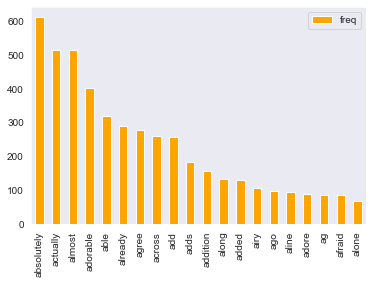

In [190]:
word_freq.plot(kind='bar', color='Orange')

#### Generating word clouds using word frequencies (dictionary)

In [191]:
word_freq_dictionary = dict(dtm1.apply(sum))

In [216]:
wordcloud = WordCloud(background_color = "white", max_words = 100, width=1440, height=700)

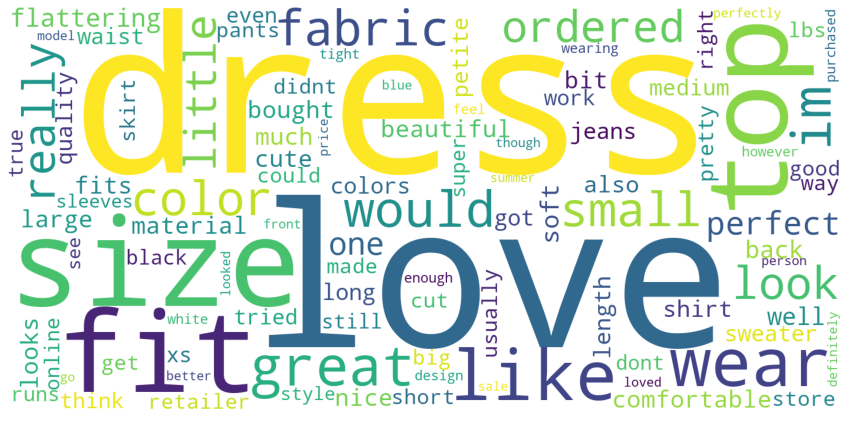

In [217]:
wordcloud = wordcloud.generate_from_frequencies(word_freq_dictionary)

fig = plt.figure(1, figsize=(15, 15), facecolor=None)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

#### Generate wordcloud based on words

In [226]:
wordcloud = WordCloud(stopwords=stop, background_color = "white", max_words = 100, width=1440, height=700)

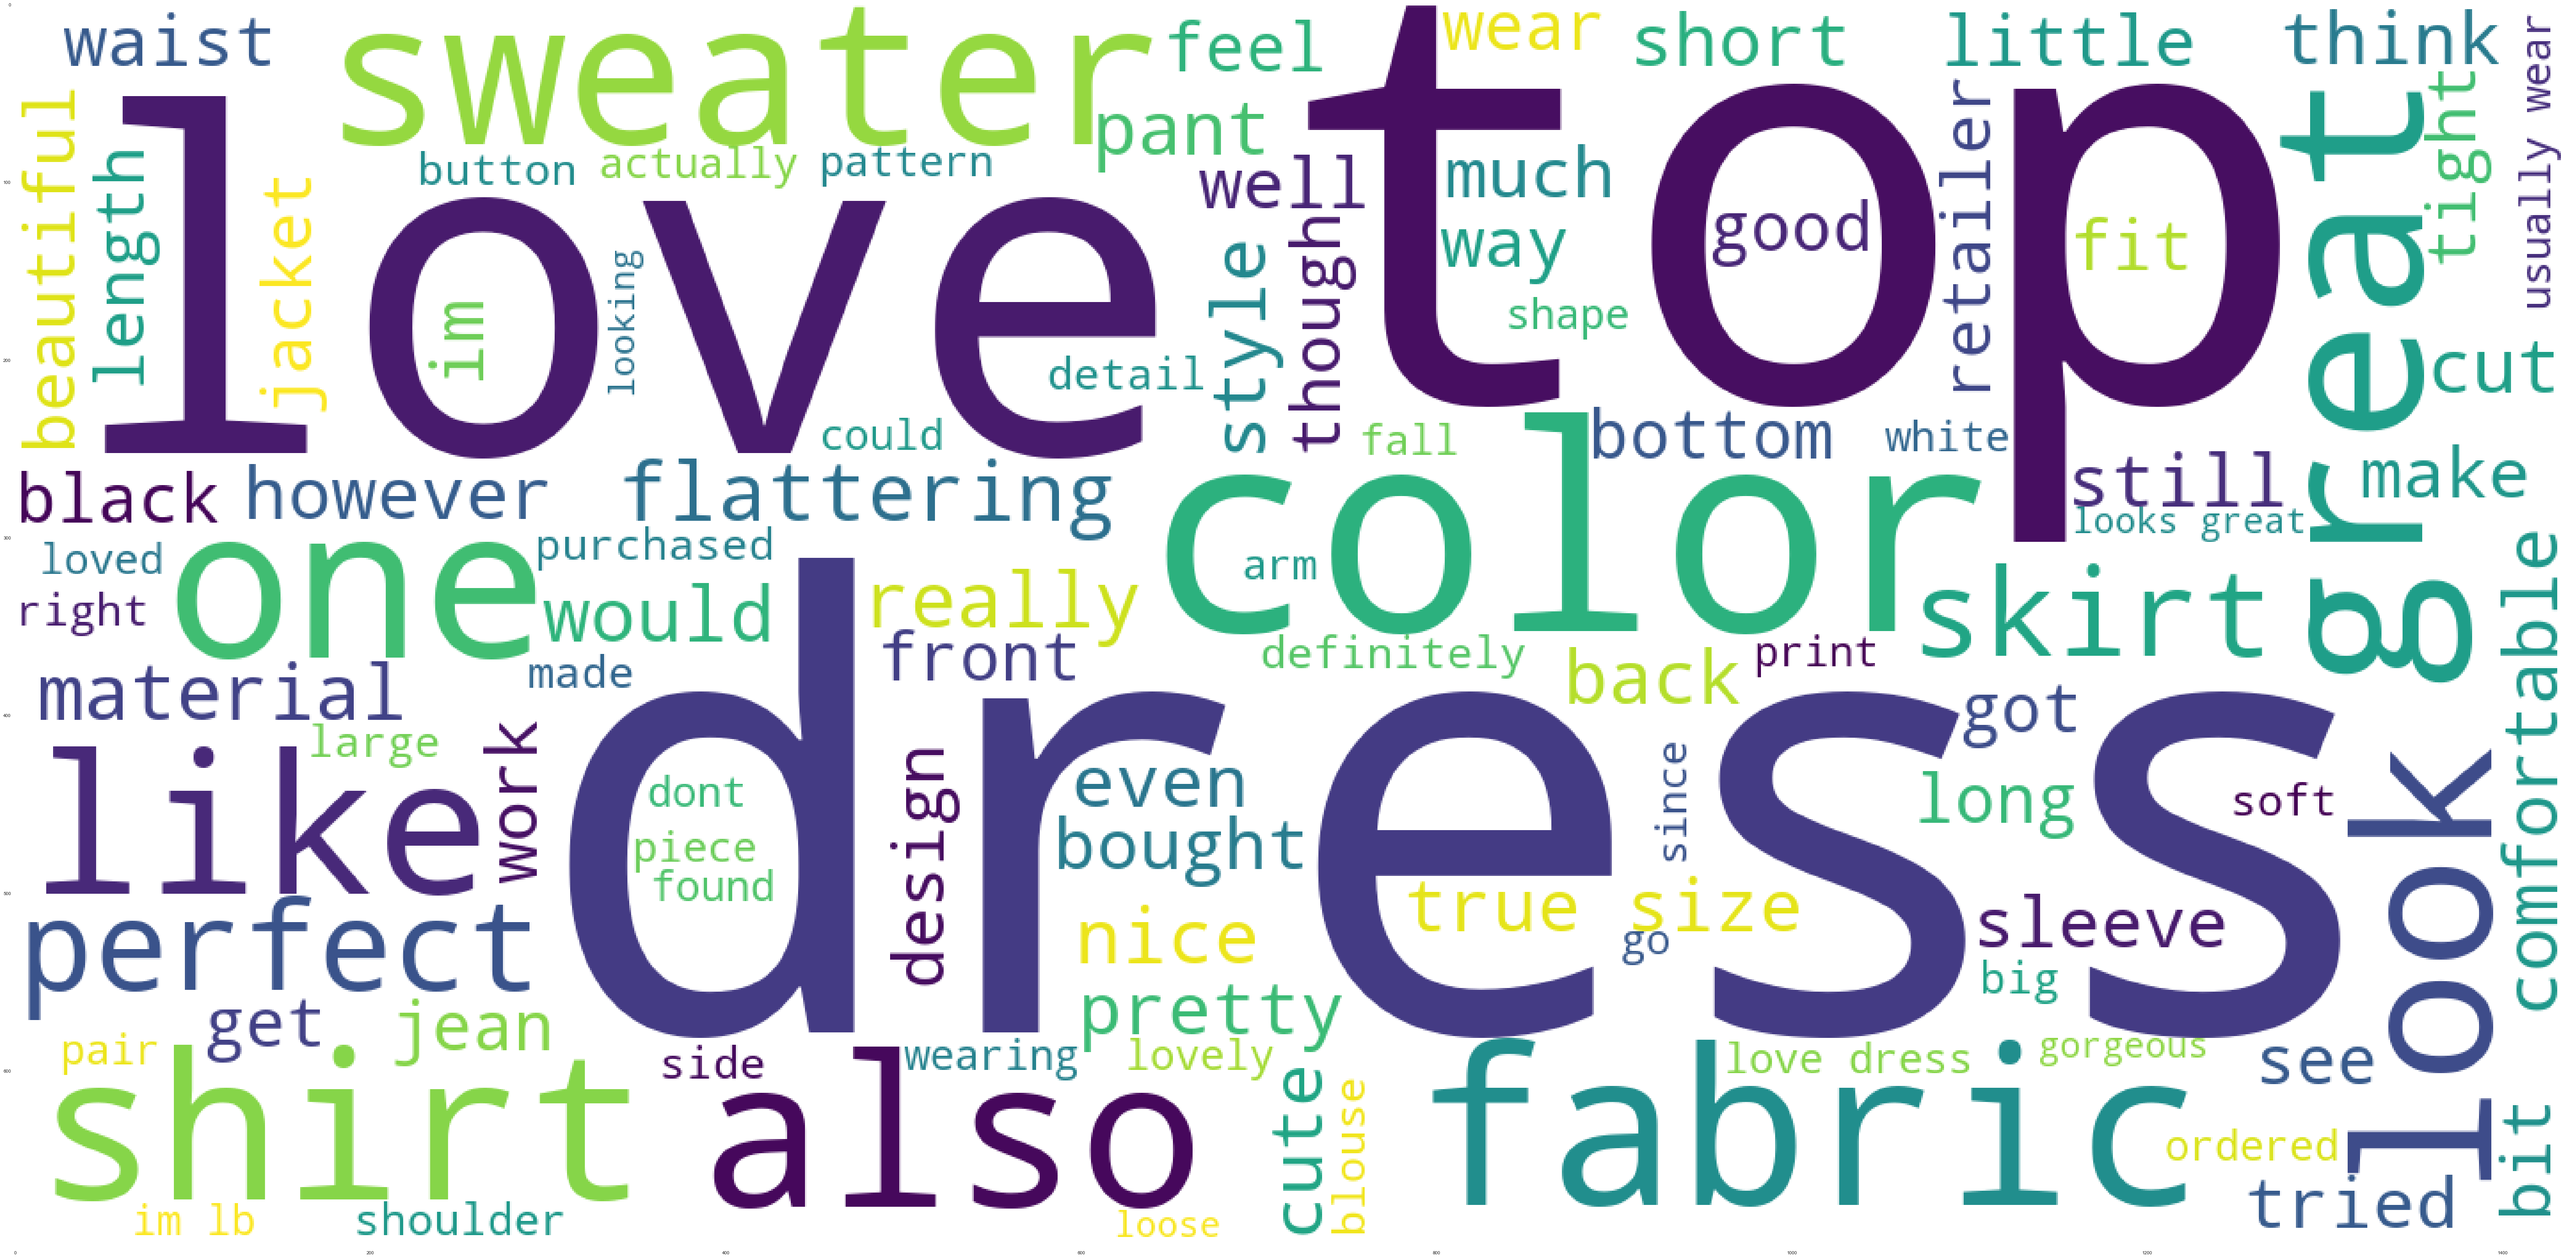

In [227]:
wordcloud = wordcloud.generate(' '.join(X_train.tolist()))
fig = plt.figure(figsize=(150,50))
plt.imshow(wordcloud)

#### Generating word clouds for Positive Review

In [218]:
wordcloud = WordCloud(stopwords=stop, background_color = "white", max_words = 100, width=1440, height=700)

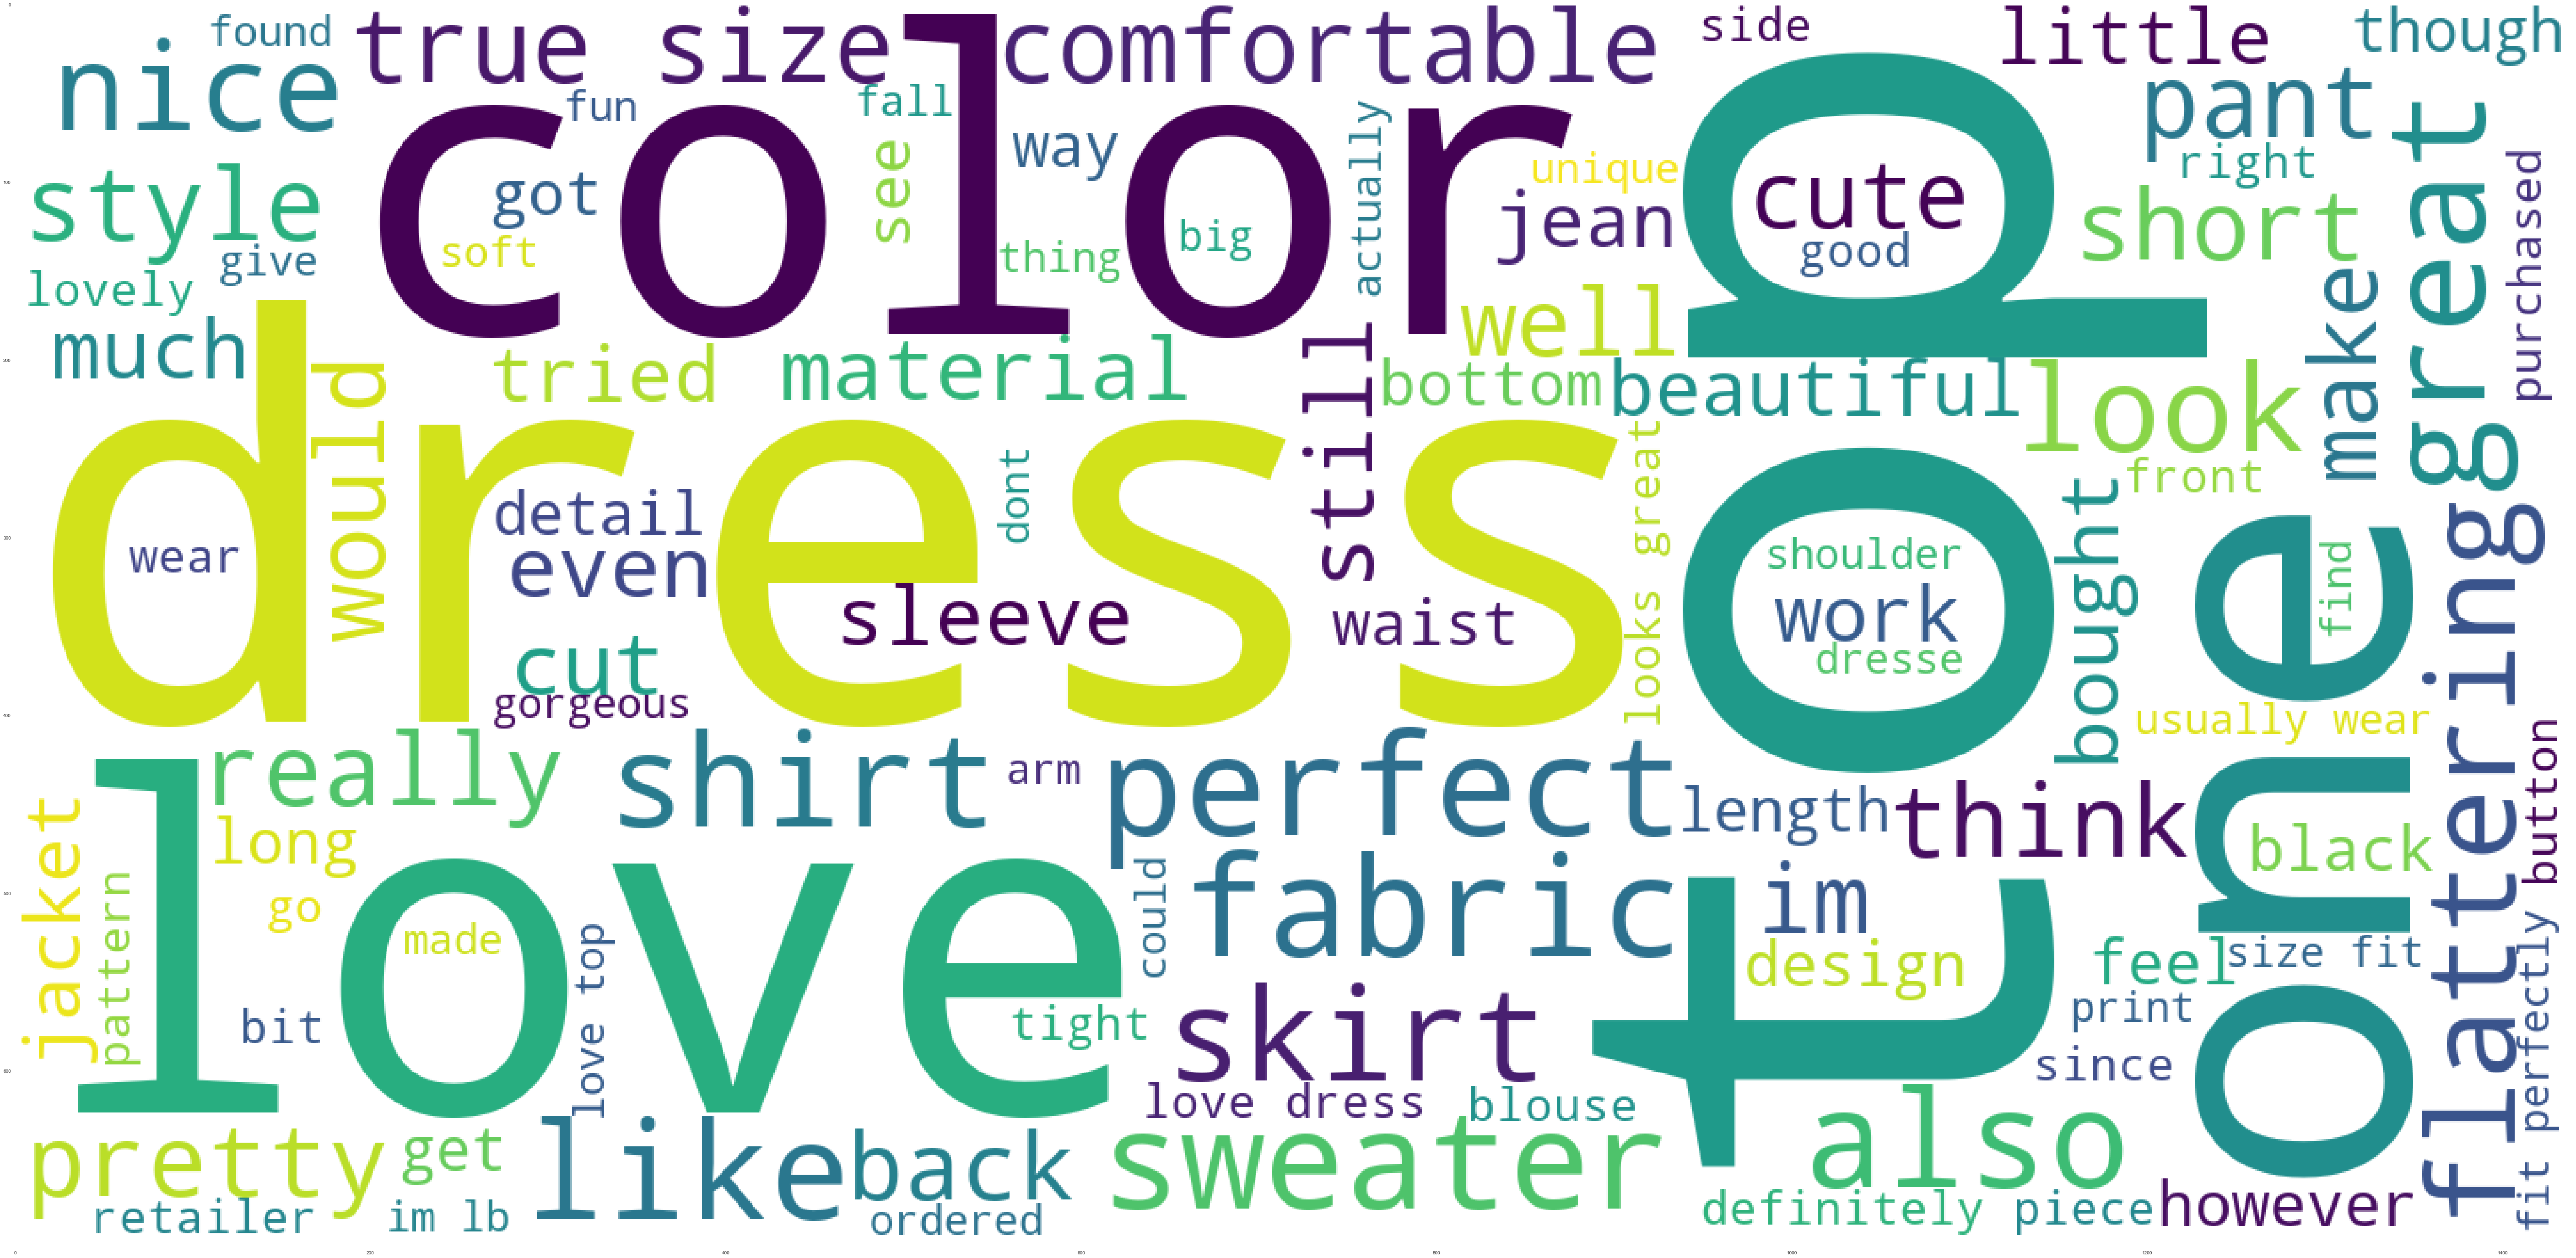

In [219]:
wordcloud = wordcloud.generate(' '.join(Positive_Review.tolist()))
fig = plt.figure(figsize=(150,50))
plt.imshow(wordcloud)

#### Generating word clouds for Negative Review

In [220]:
wordcloud = WordCloud(stopwords=stop, background_color = "white", max_words = 100, width=1440, height=700)

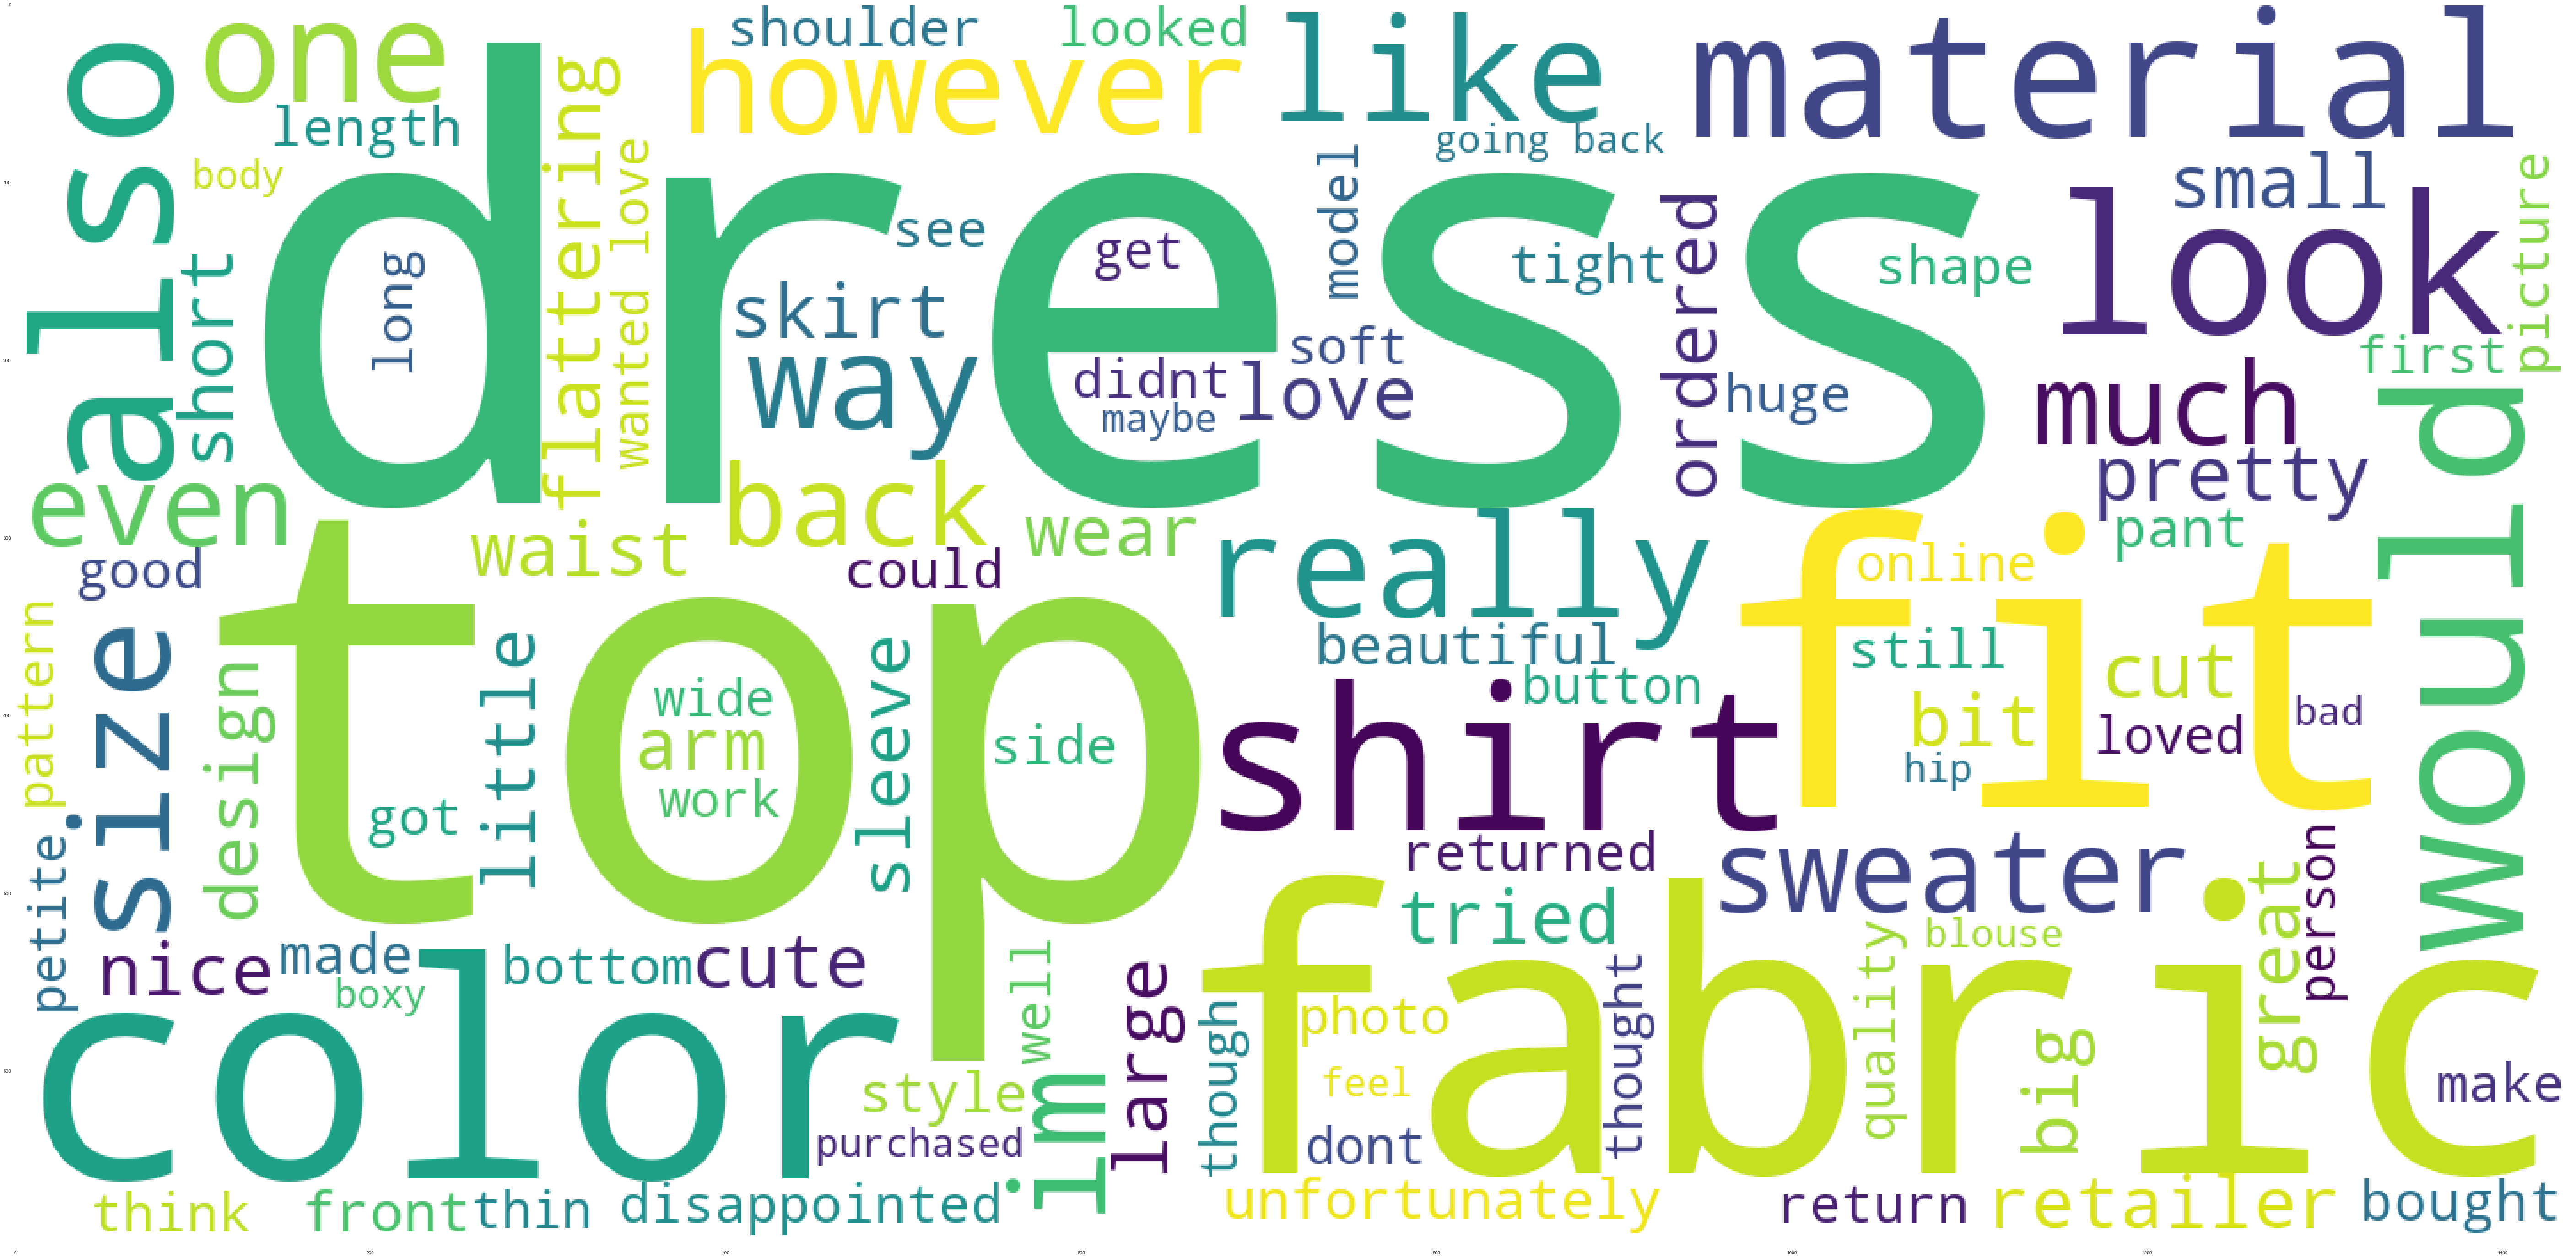

In [221]:
wordcloud = wordcloud.generate(' '.join(Negative_Review.tolist()))

fig = plt.figure(figsize=(150,50))
plt.imshow(wordcloud)

### Vectorization (count, tfidf) for both train & test

In [262]:
#Train
count_vect = CountVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1), 
                             min_df=5, 
                             lowercase = True,
                             encoding='utf-8' , 
                             max_features=1000)
X_train_count = count_vect.fit_transform(X_train)

tfidf_vect = TfidfVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1), 
                             min_df=5, 
                             encoding='utf-8' , 
                             lowercase = True,
                             max_features=1000)
X_train_tfidf = tfidf_vect.fit_transform(X_train)

#Test
X_test_count = count_vect.transform(X_test)
X_test_tfidf = tfidf_vect.transform(X_test)

In [263]:
dtm_count_train = pd.DataFrame(X_train_count.toarray(), columns=count_vect.get_feature_names())

In [264]:
dtm_count_test = pd.DataFrame(X_test_count.toarray(), columns=count_vect.get_feature_names())

In [265]:
dtm_tfidf_train = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vect.get_feature_names())

In [266]:
dtm_tfidf_test = pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vect.get_feature_names())

### Topic Modeling

### Topic Modeling using gensim

In [307]:
import gensim
from gensim import corpora

In [308]:
X_train_tokens = [doc.split() for doc in X_train]

In [309]:
dictionary = corpora.Dictionary(X_train_tokens)
print(dictionary)

Dictionary(15713 unique tokens: ['almost', 'bought', 'cardigan', 'color', 'cut']...)


In [310]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in X_train_tokens]

In [311]:
# Creating the object for LDA model using gensim library

Lda = gensim.models.ldamodel.LdaModel

In [312]:
# Running and Training LDA model on the document term matrix.

ldamodel = Lda(doc_term_matrix, num_topics=10, id2word = dictionary)

In [313]:
print(ldamodel.print_topics(num_topics=10, num_words=50))

[(0, '0.043*"dress" + 0.023*"love" + 0.016*"perfect" + 0.016*"fabric" + 0.013*"wear" + 0.013*"top" + 0.011*"comfortable" + 0.011*"summer" + 0.011*"flattering" + 0.011*"great" + 0.008*"fit" + 0.008*"im" + 0.007*"soft" + 0.007*"dressed" + 0.007*"also" + 0.007*"fits" + 0.006*"work" + 0.006*"easy" + 0.006*"casual" + 0.006*"length" + 0.005*"night" + 0.005*"bit" + 0.005*"nice" + 0.005*"material" + 0.005*"well" + 0.005*"print" + 0.005*"beautiful" + 0.005*"without" + 0.005*"right" + 0.005*"colors" + 0.005*"little" + 0.004*"cute" + 0.004*"look" + 0.004*"really" + 0.004*"light" + 0.004*"black" + 0.004*"shape" + 0.004*"worn" + 0.004*"heels" + 0.004*"size" + 0.004*"boots" + 0.004*"fall" + 0.004*"waist" + 0.004*"like" + 0.003*"spring" + 0.003*"wearing" + 0.003*"pair" + 0.003*"long" + 0.003*"one" + 0.003*"knee"'), (1, '0.018*"like" + 0.018*"would" + 0.014*"fabric" + 0.012*"top" + 0.011*"really" + 0.010*"fit" + 0.010*"one" + 0.009*"didnt" + 0.009*"back" + 0.009*"im" + 0.009*"store" + 0.008*"price" + 

## Classification

### Create user defined function for train Classification the models

In [290]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid,  valid_y, is_neural_net=False):
    
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return {'pred':predictions,'metrics':metrics.accuracy_score(predictions, valid_y)}

### Building different models with different vectors

`Naive Bayes`

In [302]:
# Naive Bayes on Count Vectors and TF-IDF

accuracy_L1 = train_model(naive_bayes.MultinomialNB(), X_train_count, y_train, X_test_count, y_test)
print("NB  for L1, Count Vectors: ", accuracy_L1["metrics"])

# Naive Bayes on Word Level TF IDF Vectors

accuracy_L1 = train_model(naive_bayes.MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("NB  for L1, WordLevel TF-IDF: ", accuracy_L1["metrics"])

pred_sentiment = pd.Series(accuracy_L1["pred"])
pred_sentiment.head()

NB  for L1, Count Vectors:  0.6153438218136822
NB  for L1, WordLevel TF-IDF:  0.6045607212303341


0    5
1    3
2    5
3    4
4    3
dtype: int64

`Logistic Regression`

In [299]:
# Logistic Regression on Count Vectors and TF-IDF

accuracy_L1 = train_model(LogisticRegression(), X_train_count, y_train, X_test_count, y_test)

print("LR  for L1, Count Vectors: ", accuracy_L1["metrics"])

# Logistic Regression on Word Level TF IDF Vectors

accuracy_L1 = train_model(LogisticRegression(), X_train_tfidf, y_train, X_test_tfidf, y_test)

print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1["metrics"])

LR  for L1, Count Vectors:  0.6273643273820046
LR  for L1, WordLevel TF-IDF:  0.635142301573272


`Linear SVC`

In [301]:
# Linear SVC on Count Vectors and TF-IDF

accuracy_L1 = train_model(svm.LinearSVC(), X_train_count, y_train, X_test_count, y_test)

print("SVC  for L1, Count Vectors: ", accuracy_L1["metrics"])

# Linear SVC on Word Level TF IDF Vectors

accuracy_L1 = train_model(svm.LinearSVC(), X_train_tfidf, y_train, X_test_tfidf, y_test)

print("SVC  for L1, WordLevel TF-IDF: ", accuracy_L1["metrics"])

SVC  for L1, Count Vectors:  0.6199398974721584
SVC  for L1, WordLevel TF-IDF:  0.627187555241294


### Topic Modeling using sklearn.decomposition

In [315]:
# train a LDA Model

lda_model = decomposition.LatentDirichletAllocation(n_components=20, learning_method='online', max_iter=20)
X_topics = lda_model.fit_transform(X_train_tfidf)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

In [316]:
# view the topic models

n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

topic_summaries

['yellow coral xss designed sleeve far shade head awful holiday',
 'pairs ago ruffle disappointing twice okay weeks stripe three tailored',
 'sweatshirt daughter sent poor rolled bell water threads throw hand',
 'fabulous real shrink life shaped havent yet incredibly must hourglass',
 'dress wear love top slip great perfect bought one cami',
 'jeans jean seasons ag poncho outfit boyfriend every goes ever',
 'silk strange appropriate stitching simple beige slit romantic waistline flaws',
 'love great color top comfortable soft shirt nice jeans cute',
 'sweater warm jacket spring fall great cozy cream coat layering',
 'size small dress ordered im fit large store xs medium',
 'compliments received wore many wedding zip lots yesterday got time',
 'dress like size top fit im would love fabric look',
 'romper holes tummy arm given fix hides hole thinking sweet',
 'dressed highly dress love wardrobe comfortable great casual recommend new',
 'fitting gotten form maeve purple depending read use

### Predictive Modeling

`Using Logistic Regression`

In [268]:
logit_model = LogisticRegression().fit(dtm_tfidf_train, y_train)

In [269]:
logit_model_1 = LogisticRegression().fit(dtm_tfidf_test, y_test)

In [270]:
import sklearn

In [281]:
print('Train Classification Report')
print(sklearn.metrics.classification_report(y_train, logit_model.predict(dtm_tfidf_train)))
print('Test Classification Report')
print(sklearn.metrics.classification_report(y_test, logit_model.predict(dtm_tfidf_test)))

Train Classification Report
              precision    recall  f1-score   support

           1       0.72      0.26      0.38       617
           2       0.56      0.31      0.40      1167
           3       0.52      0.48      0.50      2094
           4       0.53      0.38      0.44      3708
           5       0.76      0.93      0.84      9385

    accuracy                           0.69     16971
   macro avg       0.62      0.47      0.51     16971
weighted avg       0.66      0.69      0.66     16971

Test Classification Report
              precision    recall  f1-score   support

           1       0.46      0.15      0.23       204
           2       0.32      0.17      0.22       382
           3       0.42      0.37      0.40       729
           4       0.43      0.31      0.36      1200
           5       0.73      0.91      0.81      3142

    accuracy                           0.64      5657
   macro avg       0.47      0.38      0.40      5657
weighted avg       0.5

In [280]:
print('Train Classification Report')
print(sklearn.metrics.classification_report(y_train, logit_model.predict(dtm_count_train)))
print('Test Classification Report')
print(sklearn.metrics.classification_report(y_test, logit_model.predict(dtm_count_test)))

Train Classification Report
              precision    recall  f1-score   support

           1       0.62      0.36      0.46       617
           2       0.48      0.42      0.44      1167
           3       0.47      0.55      0.51      2094
           4       0.54      0.35      0.43      3708
           5       0.78      0.89      0.83      9385

    accuracy                           0.68     16971
   macro avg       0.58      0.52      0.53     16971
weighted avg       0.66      0.68      0.66     16971

Test Classification Report
              precision    recall  f1-score   support

           1       0.43      0.22      0.29       204
           2       0.27      0.26      0.27       382
           3       0.40      0.43      0.41       729
           4       0.44      0.30      0.36      1200
           5       0.77      0.87      0.81      3142

    accuracy                           0.63      5657
   macro avg       0.46      0.42      0.43      5657
weighted avg       0.6

`Using Linear Model`

In [276]:
from sklearn.svm import LinearSVC

In [277]:
lsvc_model = LinearSVC(C = 1.0).fit(dtm_tfidf_train, y_train)

In [279]:
print('Train Classification Report')
print(sklearn.metrics.classification_report(y_train, lsvc_model.predict(dtm_tfidf_train)))
print('Test Classification Report')
print(sklearn.metrics.classification_report(y_test, lsvc_model.predict(dtm_tfidf_test)))

Train Classification Report
              precision    recall  f1-score   support

           1       0.72      0.44      0.55       617
           2       0.61      0.38      0.47      1167
           3       0.55      0.47      0.51      2094
           4       0.55      0.36      0.43      3708
           5       0.76      0.94      0.84      9385

    accuracy                           0.70     16971
   macro avg       0.64      0.52      0.56     16971
weighted avg       0.67      0.70      0.67     16971

Test Classification Report
              precision    recall  f1-score   support

           1       0.31      0.19      0.24       204
           2       0.28      0.19      0.23       382
           3       0.41      0.32      0.36       729
           4       0.43      0.28      0.34      1200
           5       0.73      0.91      0.81      3142

    accuracy                           0.63      5657
   macro avg       0.43      0.38      0.39      5657
weighted avg       0.5

# --------------------------------------------------------------------------------------------------------------